In [2]:
import pandas as pd
import copy
import requests
from tqdm.notebook import tqdm
from tqdm import tqdm
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By          # - 정보 획득
from selenium.webdriver.common.keys import Keys
# from engine_connect import create_engine_connect, db_connection
from sqlalchemy import create_engine
import os
import re
import time
from bs4 import BeautifulSoup
import warnings
import pymysql
import math
warnings.filterwarnings(action='ignore')
from selenium.webdriver.common.action_chains import ActionChains
import json


import time
import datetime as dt # 사용시 datetime.dt 로 사용 # 현재 시간 사용
from datetime import datetime # 사용시 함수로 바로 사용 #-> 시간 비교

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
plt.rcParams.update({'font.family': 'NanumBarunGothic'})

import scipy
import scipy.stats as stats
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [4]:
### 한글 폰트 설치
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

path = 'c:/Windows/Fonts/malgun.ttf'  # 또는 나눔고딕: 'c:/Windows/Fonts/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [5]:
directory = os.getcwd()
print("Current working directory : ", directory)

#수집날짜
folder_date = str(dt.datetime.now().date())
folder_date = re.sub("-", ".", folder_date)
today = re.sub("\.", "", folder_date)
print('오늘 날짜 : ', folder_date)

now = dt.datetime.now()
print('현재 시간 : ', now)


Current working directory :  C:\Develops\Competetion_Gangneung_vision_planning
오늘 날짜 :  2024.08.11
현재 시간 :  2024-08-11 15:49:24.063845


In [6]:
# 2022년 
df_2022_tour_consume = pd.read_csv(f"{directory}/data/usable/2022_관광소비 추이_내국인.csv", encoding='euc-kr')
df_2022_destination_search = pd.read_csv(f"{directory}/data/usable/2022_목적지 유형별 검색량.csv", encoding='euc-kr')
df_2022_trend_mention = pd.read_csv(f"{directory}/data/usable/2022_여행유형_트렌드 언급량.csv", encoding='euc-kr')
df_2022_trend_keyword = pd.read_csv(f"{directory}/data/usable/2022_여행유형_트렌드 키워드.csv", encoding='euc-kr')
df_2022_attraction = pd.read_csv(f"{directory}/data/usable/2022_인기관광지_외지인.csv", encoding='euc-kr')
df_2022_place_visitor = pd.read_csv(f"{directory}/data/usable/2022_주요 유료관광지점 입장객 수_내국인.csv", encoding='euc-kr')
df_2022_popular_restaurant = pd.read_csv(f"{directory}/data/usable/2022_지역_맛집_외지인.csv", encoding='euc-kr')
df_2022_sns_mention = pd.read_csv(f"{directory}/data/usable/2022_SNS 언급량.csv", encoding='euc-kr')

In [7]:
# 2023년 
df_2023_tour_consume = pd.read_csv(f"{directory}/data/usable/2023_관광소비 추이_내국인.csv", encoding='euc-kr')
df_2023_destination_search = pd.read_csv(f"{directory}/data/usable/2023_목적지 유형별 검색량.csv", encoding='euc-kr')
df_2023_trend_mention = pd.read_csv(f"{directory}/data/usable/2023_여행유형_트렌드 언급량.csv", encoding='euc-kr')
df_2023_trend_keyword = pd.read_csv(f"{directory}/data/usable/2023_여행유형_트렌드 키워드.csv", encoding='euc-kr')
df_2023_attraction = pd.read_csv(f"{directory}/data/usable/2023_인기관광지_외지인.csv", encoding='euc-kr')
df_2023_place_visitor = pd.read_csv(f"{directory}/data/usable/2023_주요 유료관광지점 입장객 수_내국인.csv", encoding='euc-kr')
df_2023_popular_restaurant = pd.read_csv(f"{directory}/data/usable/2023_지역_맛집_외지인.csv", encoding='euc-kr')
df_2023_sns_mention = pd.read_csv(f"{directory}/data/usable/2023_SNS 언급량.csv", encoding='euc-kr')

In [8]:
df_tour_consume = pd.concat([df_2022_tour_consume,df_2023_tour_consume],ignore_index = True)
df_destination_search = pd.concat([df_2022_destination_search,df_2023_destination_search],ignore_index = True)
df_trend_mention = pd.concat([df_2022_trend_mention,df_2023_trend_mention],ignore_index = True)
df_trend_keyword = pd.concat([df_2022_trend_keyword,df_2023_trend_keyword],ignore_index = True)
df_attraction = pd.concat([df_2022_attraction,df_2023_attraction],ignore_index = True)
df_place_visitor = pd.concat([df_2022_place_visitor,df_2023_place_visitor],ignore_index = True)
df_popular_restaurant = pd.concat([df_2022_popular_restaurant,df_2023_popular_restaurant],ignore_index = True)
df_sns_mention = pd.concat([df_2022_sns_mention,df_2023_sns_mention],ignore_index = True)

### 데이터 확인

In [9]:
df_tour_consume

,기준연월,업종대분류명,소비액(천원)
0,202212,전체,98434562.0
1,202201,전체,97465832.0
2,202202,전체,82937149.0
3,202203,전체,70793096.0
4,202204,전체,102273191.0
...,...,...,...
163,202305,쇼핑업,14914005.0
164,202305,운송업,109760.0
165,202305,숙박업,14634523.0
166,202304,여행업,174354.0


In [16]:
df_destination_search

,기준연월,목적지 유형,목적지 검색량
0,202204,전체,2447174
1,202207,전체,4029112
2,202202,전체,2190340
3,202206,전체,3310686
4,202208,전체,4943373
...,...,...,...
235,202312,문화관광,230390
236,202312,역사관광,56014
237,202312,자연관광,217036
238,202312,체험관광,16478


In [17]:
df_trend_mention

,기준연월,여행유형/트렌드명,언급건수
0,202208,레포츠,67901
1,202207,레포츠,57123
2,202210,레포츠,52896
3,202207,휴식/힐링,52547
4,202206,레포츠,51590
...,...,...,...
115,202310,미식,2699
116,202304,미식,2699
117,202311,미식,2614
118,202302,체험,2555


In [18]:
df_trend_keyword

,순위,분류,관련 키워드,언급건수
0,1,휴식/힐링,힐링,166263
1,2,레포츠,캠핑,100017
2,3,레포츠,등산,64289
3,4,레포츠,서핑,50305
4,5,레포츠,스키,45427
...,...,...,...,...
849,420,휴식/힐링,백캉스,1
850,420,레포츠,오프로드라이딩,1
851,420,체험,현지인체험,1
852,420,레포츠,bsac,1


In [19]:
df_attraction

,순위,관광지명,주소,분류
0,1,속초관광수산시장,강원 속초시 중앙로147번길 16-0,시장
1,2,속초해변,강원 속초시 해오름로 186-0,자연경관(하천/해양)
2,3,경포해변,강원 강릉시,자연경관(하천/해양)
3,4,쏠비치삼척,강원 삼척시 수로부인길 453-0,콘도미니엄
4,5,주문진항,강원 강릉시 해안로 1758-14,자연경관(하천/해양)
...,...,...,...,...
195,96,춘천시외버스터미널,강원 춘천시 경춘로 2341-0,교통시설
196,97,씨마크호텔,강원 강릉시 해안로406번길 2-0,호텔
197,98,묵호항,강원 동해시,자연경관(하천/해양)
198,99,설악워터피아,강원 속초시 미시령로2983번길 88-0,테마공원


In [20]:
df_place_visitor

,순위,광역지자체명,기초지자체명,관광지명,기준연월,입장객수,Unnamed: 6
0,1,강원특별자치도,정선군,강원랜드 카지노,202201,121352.0,2066548.0
1,1,강원특별자치도,정선군,강원랜드 카지노,202202,113616.0,2066548.0
2,1,강원특별자치도,정선군,강원랜드 카지노,202203,119344.0,2066548.0
3,1,강원특별자치도,정선군,강원랜드 카지노,202204,131674.0,2066548.0
4,1,강원특별자치도,정선군,강원랜드 카지노,202205,162098.0,2066548.0
...,...,...,...,...,...,...,...
5575,229,강원특별자치도,영월군,쾌연재도자미술관,202308,0.0,133.0
5576,229,강원특별자치도,영월군,쾌연재도자미술관,202309,0.0,133.0
5577,229,강원특별자치도,영월군,쾌연재도자미술관,202310,0.0,133.0
5578,229,강원특별자치도,영월군,쾌연재도자미술관,202311,0.0,133.0


In [21]:
df_popular_restaurant

,순위,업소명,주소,분류
0,1,동화가든본점,강원 강릉시 초당순두부길77번길 15-0,한식
1,2,청초수물회속초본점,강원 속초시 엑스포로 12-36,전문음식
2,3,바다정원,강원 고성군 버리깨길 23-0,카페/찻집
3,4,통나무집닭갈비본점,강원 춘천시 신샘밭로 763-0,전문음식
4,5,강릉커피거리,강원 강릉시 창해로14번길 0-0,음식점기타
...,...,...,...,...
195,96,호원가든닭갈비,강원 춘천시 북한강변길 346-0,전문음식
196,97,어나더블루,강원 속초시 장사항해안길 61-0,카페/찻집
197,98,인필드,강원 춘천시 가락재로 40-0,카페/찻집
198,99,강릉빵다방본점,강원 강릉시 남강초교1길 24-0,간이음식


In [22]:
df_sns_mention

,기준연월,지역명,검색량(건)
0,202201,강원특별자치도,267577
1,202202,강원특별자치도,236074
2,202203,강원특별자치도,233504
3,202204,강원특별자치도,252280
4,202205,강원특별자치도,359779
5,202206,강원특별자치도,415213
6,202207,강원특별자치도,467326
7,202208,강원특별자치도,540562
8,202209,강원특별자치도,406037
9,202210,강원특별자치도,404573


### 데이터 탐색

In [31]:
df_tour_consume.업종대분류명.unique()

array(['전체', '쇼핑업', '운송업', '숙박업', '여행업', '식음료업', '여가서비스업'], dtype=object)

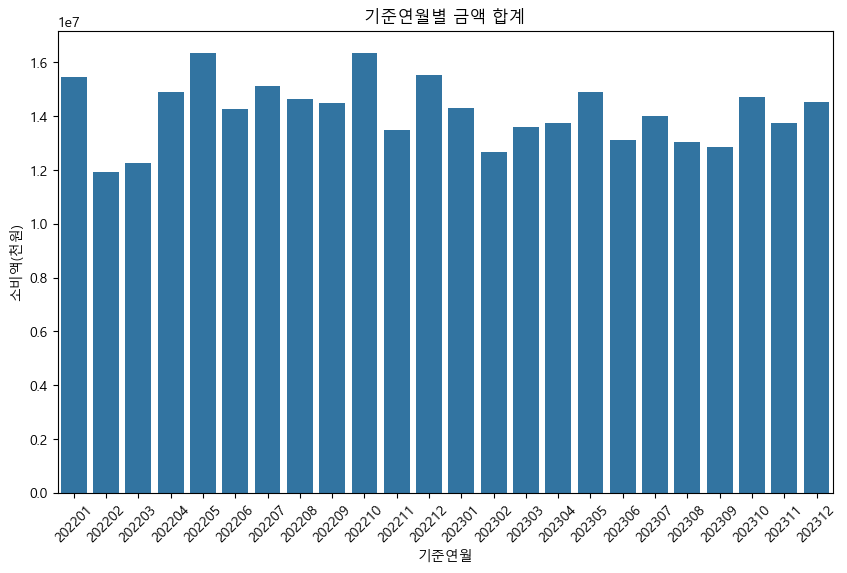

In [43]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=df_tour_consume.query("업종대분류명 == '쇼핑업'").sort_values("기준연월"), x='기준연월', y='소비액(천원)')
plt.title('기준연월별 금액 합계')
plt.xlabel('기준연월')
plt.ylabel('소비액(천원)')
plt.xticks(rotation=45)
plt.show()

In [33]:
df_tour_consume.query("업종대분류명 == '운송업'")

,기준연월,업종대분류명,소비액(천원)
13,202208,운송업,145410.0
14,202210,운송업,226530.0
20,202209,운송업,105182.0
31,202211,운송업,105075.0
37,202212,운송업,62616.0
44,202204,운송업,63098.0
50,202203,운송업,29316.0
56,202202,운송업,43880.0
62,202201,운송업,51621.0
63,202206,운송업,119819.0


In [34]:
df_tour_consume.query("업종대분류명 == '숙박업'")

,기준연월,업종대분류명,소비액(천원)
15,202210,숙박업,17464857.0
21,202209,숙박업,15099939.0
26,202208,숙박업,31706026.0
30,202211,숙박업,11551722.0
36,202212,숙박업,18158877.0
45,202204,숙박업,11703977.0
51,202203,숙박업,8223243.0
57,202202,숙박업,17166515.0
69,202207,숙박업,26495641.0
74,202201,숙박업,20737900.0


In [35]:
df_tour_consume.query("업종대분류명 == '여행업'")

,기준연월,업종대분류명,소비액(천원)
16,202209,여행업,317343.0
22,202208,여행업,570344.0
29,202210,여행업,499713.0
35,202211,여행업,303063.0
41,202212,여행업,226333.0
46,202203,여행업,170724.0
52,202202,여행업,208253.0
58,202201,여행업,230240.0
64,202207,여행업,651482.0
70,202206,여행업,480660.0


In [36]:
df_tour_consume.query("업종대분류명 == '식음료업'")

,기준연월,업종대분류명,소비액(천원)
17,202209,식음료업,60964542.0
23,202208,식음료업,93851186.0
28,202210,식음료업,74407916.0
34,202211,식음료업,53466431.0
40,202212,식음료업,55716521.0
42,202202,식음료업,44666268.0
47,202203,식음료업,36745869.0
59,202201,식음료업,53137848.0
65,202207,식음료업,79004011.0
71,202206,식음료업,67835396.0


In [37]:
df_tour_consume.query("업종대분류명 == '여가서비스업'")

,기준연월,업종대분류명,소비액(천원)
18,202209,여가서비스업,23220443.0
24,202208,여가서비스업,26141283.0
27,202210,여가서비스업,26398731.0
33,202211,여가서비스업,19111448.0
39,202212,여가서비스업,8750245.0
48,202203,여가서비스업,13367848.0
53,202204,여가서비스업,21751022.0
54,202202,여가서비스업,8923595.0
60,202201,여가서비스업,7854986.0
66,202207,여가서비스업,26066963.0
